# 1. Instalar librerias



In [161]:
pip install torch-scatter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
pip install torch-sparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Crear dataset

In [164]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
genes = pd.read_csv('/content/drive/MyDrive/ART_Inv/Kinase_gene_matrix.csv')
Y = pd.read_csv('/content/drive/MyDrive/ART_Inv/Kinase_gene_matrix_classification.csv')

genes = genes.iloc[:,1:103] 
Y = Y.iloc[:,1:2] 

In [167]:
edge_index = torch.tensor([[  1,   1,   1,   1,   2,   3,   3,   4,   5,   5,   5,   6,   8,
         8,   8,   9,   9,  11,  12,  12,  13,  13,  13,  14,  15,  15,
        15,  16,  16,  19,  19,  19,  20,  20,  20,  21,  21,  22,  22,
        23,  23,  23,  25,  25,  25,  27,  27,  28,  29,  29,  33,  33,
        34,  34,  35,  35,  35,  35,  35,  37,  38,  39,  39,  39,  39,
        39,  39,  39,  39,  40,  40,  41,  41,  41,  42,  42,  43,  43,
        43,  43,  43,  43,  43,  44,  44,  44,  44,  44,  44,  44,  44,
        44,  45,  46,  47,  48,  48,  49,  49,  49,  49,  49,  49,  49,
        49,  49,  50,  51,  51,  51,  51,  51,  51,  51,  52,  56,  56,
        56,  56,  56,  56,  56,  57,  57,  57,  57,  57,  58,  58,  60,
        61,  61,  61,  63,  63,  63,  63,  65,  66,  66,  66,  67,  68,
        68,  68,  68,  68,  68,  69,  69,  69,  69,  69,  69,  69,  69,
        70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,  71,  71,
        71,  71,  71,  71,  71,  72,  72,  72,  72,  73,  73,  73,  73,
        73,  73,  73,  73,  74,  74,  74,  74,  74,  76,  76,  76,  76,
        77,  78,  78,  78,  78,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  78,  78,  78,  79,  79,  79,  79,  79,  79,
        79,  79,  79,  79,  79,  79,  79,  79,  82,  82,  82,  82,  82,
        82,  82,  83,  84,  85,  85,  85,  87,  89,  89,  89,  89,  90,
        90,  90,  90,  93,  94,  95,  98,  98,  98,  98,  98,  98,  98,
        99,  99, 101,  76,  78,  77,  79,  80,  71,  72,  72,  76,  71,
         4,  80,  71,  73,  72,  72,  71,  10,  10,  11,  10,  11,  12,
        11,  16,  11,  66,  11,  67,  58,  59,  18,  91,  19,  90,  18,
        28,  44,  21,  33,  34,  35,  32,  47,  33,  28,  52,  24,  48,
        27,  37,  99,  97,  26,  24,  36,  11,  26,  27, 100,  28,  21,
        44,  94,  92,  90,  20,  93,  22,  24,  27,  54,  53,  55,  54,
        34,  55,  88,  41,  23,  54,  53,  26,  17,  94,  47,  81,  92,
        21,  20,  28,  93,  55,  55,  86,  24,  27,  52,  50,  40,  31,
        48,  29,  30,  27,  51,  23,  35,  90,  50,  20,  48,  24,  40,
        24,  90,  20,  59,  18,  58,  57,  19,  19,  59,  58,  18,  90,
        18,  59,  59,  37,  64,  86,   9,  72,  61,  71,  61,  75,  76,
        67,  75,  69,  66,  73,  74,  67,  75,  73,  67,  70,  76,  66,
        75,  74,  78,  72,  73,  71,  66,   0,  62,   6,   5,   4,  77,
        76,  77,   4,  62,   0,  76,   6,  72,  77,   0,   6,  76,  71,
         3,   9,  76,  72,  66,  63,  67,  66,  67,  70,  73,  76,   0,
        77,   7,   6,   0,  73,  71,   5,  76,   7,  74,   4,  79,  82,
        77,   6,  72,   0,  70,  66,   3,   9,  63,   8,  82,   9,  76,
         0,  72,   6,  70,   3,  77,   4,  63,  71,   8,  73,   9,  63,
        73,  71,  80,  96,  72,  80,  86,  61,  37,  20,   3,  77,  76,
        79,  78,  59,  58,  19,  18,  92,  92,  61,  43,  99, 100,  88,
        33,  41,  37,  37, 100,  20],
                           [ 76,  78,  77,  79,  80,  71,  72,  72,  76,  71,   4,  80,  71,
        73,  72,  72,  71,  10,  10,  11,  10,  11,  12,  11,  16,  11,
        66,  11,  67,  58,  59,  18,  91,  19,  90,  18,  28,  44,  21,
        33,  34,  35,  32,  47,  33,  28,  52,  24,  48,  27,  37,  99,
        97,  26,  24,  36,  11,  26,  27, 100,  28,  21,  44,  94,  92,
        90,  20,  93,  22,  24,  27,  54,  53,  55,  54,  34,  55,  88,
        41,  23,  54,  53,  26,  17,  94,  47,  81,  92,  21,  20,  28,
        93,  55,  55,  86,  24,  27,  52,  50,  40,  31,  48,  29,  30,
        27,  51,  23,  35,  90,  50,  20,  48,  24,  40,  24,  90,  20,
        59,  18,  58,  57,  19,  19,  59,  58,  18,  90,  18,  59,  59,
        37,  64,  86,   9,  72,  61,  71,  61,  75,  76,  67,  75,  69,
        66,  73,  74,  67,  75,  73,  67,  70,  76,  66,  75,  74,  78,
        72,  73,  71,  66,   0,  62,   6,   5,   4,  77,  76,  77,   4,
        62,   0,  76,   6,  72,  77,   0,   6,  76,  71,   3,   9,  76,
        72,  66,  63,  67,  66,  67,  70,  73,  76,   0,  77,   7,   6,
         0,  73,  71,   5,  76,   7,  74,   4,  79,  82,  77,   6,  72,
         0,  70,  66,   3,   9,  63,   8,  82,   9,  76,   0,  72,   6,
        70,   3,  77,   4,  63,  71,   8,  73,   9,  63,  73,  71,  80,
        96,  72,  80,  86,  61,  37,  20,   3,  77,  76,  79,  78,  59,
        58,  19,  18,  92,  92,  61,  43,  99, 100,  88,  33,  41,  37,
        37, 100,  20,   1,   1,   1,   1,   2,   3,   3,   4,   5,   5,
         5,   6,   8,   8,   8,   9,   9,  11,  12,  12,  13,  13,  13,
        14,  15,  15,  15,  16,  16,  19,  19,  19,  20,  20,  20,  21,
        21,  22,  22,  23,  23,  23,  25,  25,  25,  27,  27,  28,  29,
        29,  33,  33,  34,  34,  35,  35,  35,  35,  35,  37,  38,  39,
        39,  39,  39,  39,  39,  39,  39,  40,  40,  41,  41,  41,  42,
        42,  43,  43,  43,  43,  43,  43,  43,  44,  44,  44,  44,  44,
        44,  44,  44,  44,  45,  46,  47,  48,  48,  49,  49,  49,  49,
        49,  49,  49,  49,  49,  50,  51,  51,  51,  51,  51,  51,  51,
        52,  56,  56,  56,  56,  56,  56,  56,  57,  57,  57,  57,  57,
        58,  58,  60,  61,  61,  61,  63,  63,  63,  63,  65,  66,  66,
        66,  67,  68,  68,  68,  68,  68,  68,  69,  69,  69,  69,  69,
        69,  69,  69,  70,  70,  70,  70,  70,  70,  70,  70,  70,  70,
        70,  71,  71,  71,  71,  71,  71,  71,  72,  72,  72,  72,  73,
        73,  73,  73,  73,  73,  73,  73,  74,  74,  74,  74,  74,  76,
        76,  76,  76,  77,  78,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  78,  78,  78,  78,  78,  78,  79,  79,  79,
        79,  79,  79,  79,  79,  79,  79,  79,  79,  79,  79,  82,  82,
        82,  82,  82,  82,  82,  83,  84,  85,  85,  85,  87,  89,  89,
        89,  89,  90,  90,  90,  90,  93,  94,  95,  98,  98,  98,  98,
        98,  98,  98,  99,  99, 101]], dtype=torch.int64)

In [168]:
list_data=[]

for g in range(181):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    a.append(i*10)
    b.append(a)
  x = torch.tensor([b], dtype=torch.float)
  x = torch.reshape(x, (-1,))
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g].to_numpy()], dtype=torch.float)
  data = Data(x=x, edge_index=edge_index, y=y)
  list_data.append(data)

print(list_data)

[Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526], y=[1, 1]), Data(x=[102], edge_index=[2, 526]

# 3. Dibujar grafo

In [169]:
def plot_graph(data,description=True):
    edges_raw = data.edge_index.numpy()
    edges = [(x, y) for x, y in zip(edges_raw[0, :], edges_raw[1, :])]
    labels = data.x.numpy()
    G = nx.Graph()
    print(G)
    G.add_nodes_from(list(range(np.max(edges_raw))))
    G.add_edges_from(edges)
    plt.subplot(111)
    options = {
       'node_size': 100,
       'width': 1,
    }
    nx.draw(G, with_labels=description, node_color=labels.tolist(), cmap=plt.cm.tab10, font_weight='bold', **options)
    plt.show()

In [170]:
print("Algunas estadísticas del grafo:")
print(f'Número de Características: {data.num_features}')
print(f'Número de Nodos: {data.num_nodes}')
print(f'Número de bordes: {data.num_edges}')
print(f'Grado promedio de nodos: {data.num_edges / data.num_nodes:.2f}')
print(f'¿Contiene nodos aislados?: {data.contains_isolated_nodes()}')
print(f'¿Contiene autoloops?: {data.contains_self_loops()}')
print(f'¿Es no dirigido?: {data.is_undirected()}')

Algunas estadísticas del grafo:
Número de Características: 1
Número de Nodos: 102
Número de bordes: 526
Grado promedio de nodos: 5.16
¿Contiene nodos aislados?: False
¿Contiene autoloops?: False
¿Es no dirigido?: True


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


Graph with 0 nodes and 0 edges


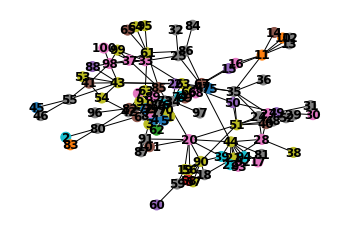

In [171]:
plot_graph(data,True)

# 4. Modelo

In [172]:
import torch
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import remove_self_loops, add_self_loops


class SAGEConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super(SAGEConv, self).__init__(aggr='max')
        self.lin = torch.nn.Linear(in_channels, out_channels)
        self.act = torch.nn.ReLU()
        self.update_lin = torch.nn.Linear(in_channels + out_channels, in_channels, bias=False)
        self.update_act = torch.nn.ReLU()

    def forward(self, x, edge_index):
        edge_index, _ = remove_self_loops(edge_index)
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        return self.propagate(edge_index, size=(x.size(0), x.size(0)), x=x)

    def message(self, x_j):
        x_j = self.lin(x_j)
        x_j = self.act(x_j)

        return x_j

    def update(self, aggr_out, x):
        new_embedding = torch.cat([aggr_out, x], dim=1)
        new_embedding = self.update_lin(new_embedding)
        new_embedding = self.update_act(new_embedding)
        return new_embedding


In [173]:
embed_dim = 102
import torch
import torch.nn.functional as F
from torch_geometric.nn import TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = SAGEConv(embed_dim, 102)
        self.pool1 = TopKPooling(102, ratio=0.8)
        self.conv2 = SAGEConv(102, 102)
        self.pool2 = TopKPooling(102, ratio=0.8)
        self.item_embedding = torch.nn.Embedding(num_embeddings=390, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(204, 51)
        self.lin3 = torch.nn.Linear(51, 1)
        self.act1 = torch.nn.ReLU()
        print(self)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = torch.tensor(x).to(torch.int)
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))

        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = F.relu(self.conv2(x, edge_index))

        x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 + x2

        x = self.lin1(x)
        x = self.act1(x)

        x = F.dropout(x, p=0.5, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)

        return x

# 5. New attempt

In [174]:
class AverageMeter(object):
    """
    Keeps track of most recent, average, sum, and count of a metric.
    """

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [175]:
from sklearn.metrics import roc_auc_score
def evaluate(loader, model):
    model.eval()  
    predictions = []
    labels = []

    # Batches
    for data in loader:
        data = data
        pred = model(data).detach().numpy()
        label = data.y.detach().numpy()
        label = label.squeeze(1)
        predictions.append(pred)
        labels.append(label)

    return roc_auc_score(labels, predictions)

In [176]:
from torch import nn
def train_net():
    torch.manual_seed(7)
    np.random.seed(7)
    best_acc = 0

    model = Net()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    model = model

    # Loss function
    criterion = nn.BCELoss()

    train_loader = list_data[0:144]
    test_loader = list_data[145:182]
    # val_loader = list_data[172:182]

    # Epochs
    for epoch in range(0, 11):
        train_loss = train(train_loader=train_loader,
                           model=model,
                           criterion=criterion,
                           optimizer=optimizer,
                           epoch=epoch)


        train_acc = evaluate(train_loader, model)
        # val_acc = evaluate(val_loader, model)
        test_acc = evaluate(test_loader, model)
        print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f},  Test Auc: {:.5f}'.
              format(epoch, train_loss, train_acc,  test_acc))


In [177]:
def clip_gradient(optimizer, grad_clip):
    """
    Clips gradients computed during backpropagation to avoid explosion of gradients.
    :param optimizer: optimizer with the gradients to be clipped
    :param grad_clip: clip value
    """
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)

In [178]:
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()  

    losses = AverageMeter()

    # Batches
    for i, data in enumerate(train_loader):
        data = data
        label = data.y
        label = label.squeeze(1)

        # Forward prop.
        out = model(data)

        # Calculate loss
        loss = criterion(out, label)

        # Back prop.
        optimizer.zero_grad()
        loss.backward()

        # Clip gradients
        clip_gradient(optimizer, 5)

        # Update weights
        optimizer.step()

        # Keep track of metrics
        losses.update(loss.item())

        # Print status
        step = 20
        if i % step == 0:
            status = 'Epoch: [{0}][{1}/{2}]\t' \
                     'Loss {loss.val:.5f} ({loss.avg:.5f})\t'.format(epoch, i,
                                                                     len(train_loader),
                                                                     loss=losses)
            # print(status)

    return losses.avg

In [179]:
loss = train_net() #80-20

Net(
  (conv1): SAGEConv()
  (pool1): TopKPooling(102, ratio=0.8, multiplier=1.0)
  (conv2): SAGEConv()
  (pool2): TopKPooling(102, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(390, 102)
  (lin1): Linear(in_features=204, out_features=51, bias=True)
  (lin3): Linear(in_features=51, out_features=1, bias=True)
  (act1): ReLU()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 000, Loss: 0.70648, Train Auc: 0.62181,  Test Auc: 0.48438


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 001, Loss: 0.69515, Train Auc: 0.69981,  Test Auc: 0.39375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 002, Loss: 0.69897, Train Auc: 0.60545,  Test Auc: 0.47500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 003, Loss: 0.69575, Train Auc: 0.68724,  Test Auc: 0.63125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 004, Loss: 0.69159, Train Auc: 0.66573,  Test Auc: 0.54688


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 005, Loss: 0.69370, Train Auc: 0.75034,  Test Auc: 0.61563


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 006, Loss: 0.69223, Train Auc: 0.83427,  Test Auc: 0.52500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 007, Loss: 0.68960, Train Auc: 0.76670,  Test Auc: 0.45312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 008, Loss: 0.69204, Train Auc: 0.72463,  Test Auc: 0.48750


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 009, Loss: 0.69628, Train Auc: 0.69270,  Test Auc: 0.46250
Epoch: 010, Loss: 0.69244, Train Auc: 0.74684,  Test Auc: 0.63750


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [180]:
from torch import nn
def train_net():
    torch.manual_seed(7)
    np.random.seed(7)
    best_acc = 0

    model = Net()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    model = model

    # Loss function
    criterion = nn.BCELoss()

    train_loader = list_data[0:154]
    test_loader = list_data[155:182]
    # val_loader = list_data[172:182]

    # Epochs
    for epoch in range(0, 17):
        train_loss = train(train_loader=train_loader,
                           model=model,
                           criterion=criterion,
                           optimizer=optimizer,
                           epoch=epoch)


        train_acc = evaluate(train_loader, model)
        # val_acc = evaluate(val_loader, model)
        test_acc = evaluate(test_loader, model)
        print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f},  Test Auc: {:.5f}'.
              format(epoch, train_loss, train_acc,  test_acc))


In [181]:
loss = train_net() #85-15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Net(
  (conv1): SAGEConv()
  (pool1): TopKPooling(102, ratio=0.8, multiplier=1.0)
  (conv2): SAGEConv()
  (pool2): TopKPooling(102, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(390, 102)
  (lin1): Linear(in_features=204, out_features=51, bias=True)
  (lin3): Linear(in_features=51, out_features=1, bias=True)
  (act1): ReLU()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 000, Loss: 0.70427, Train Auc: 0.53097,  Test Auc: 0.61111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 001, Loss: 0.70384, Train Auc: 0.72328,  Test Auc: 0.59722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 002, Loss: 0.69658, Train Auc: 0.78435,  Test Auc: 0.72917


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 003, Loss: 0.69154, Train Auc: 0.75313,  Test Auc: 0.63194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 004, Loss: 0.68285, Train Auc: 0.77921,  Test Auc: 0.56944


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 005, Loss: 0.70407, Train Auc: 0.73889,  Test Auc: 0.50000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 006, Loss: 0.65821, Train Auc: 0.82741,  Test Auc: 0.62500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 007, Loss: 0.63909, Train Auc: 0.85263,  Test Auc: 0.64583


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 008, Loss: 0.54321, Train Auc: 0.93515,  Test Auc: 0.63889


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 009, Loss: 0.52545, Train Auc: 0.97221,  Test Auc: 0.72917


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 010, Loss: 0.40175, Train Auc: 0.98113,  Test Auc: 0.70139


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 011, Loss: 0.32875, Train Auc: 0.99005,  Test Auc: 0.74306


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 012, Loss: 0.24894, Train Auc: 0.99794,  Test Auc: 0.72222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 013, Loss: 0.16231, Train Auc: 0.99983,  Test Auc: 0.72917


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 014, Loss: 0.12267, Train Auc: 1.00000,  Test Auc: 0.77778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 015, Loss: 0.10992, Train Auc: 0.99863,  Test Auc: 0.81250
Epoch: 016, Loss: 0.06481, Train Auc: 0.99966,  Test Auc: 0.81944


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


In [182]:
from torch import nn
def train_net():
    torch.manual_seed(7)
    np.random.seed(7)
    best_acc = 0

    model = Net()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

    model = model

    # Loss function
    criterion = nn.BCELoss()

    train_loader = list_data[0:163]
    test_loader = list_data[164:182]
    # val_loader = list_data[172:182]

    # Epochs
    for epoch in range(0, 11):
        train_loss = train(train_loader=train_loader,
                           model=model,
                           criterion=criterion,
                           optimizer=optimizer,
                           epoch=epoch)


        train_acc = evaluate(train_loader, model)
        # val_acc = evaluate(val_loader, model)
        test_acc = evaluate(test_loader, model)
        print('Epoch: {:03d}, Loss: {:.5f}, Train Auc: {:.5f},  Test Auc: {:.5f}'.
              format(epoch, train_loss, train_acc,  test_acc))


In [183]:
loss = train_net() #90-10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Net(
  (conv1): SAGEConv()
  (pool1): TopKPooling(102, ratio=0.8, multiplier=1.0)
  (conv2): SAGEConv()
  (pool2): TopKPooling(102, ratio=0.8, multiplier=1.0)
  (item_embedding): Embedding(390, 102)
  (lin1): Linear(in_features=204, out_features=51, bias=True)
  (lin3): Linear(in_features=51, out_features=1, bias=True)
  (act1): ReLU()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 000, Loss: 0.70396, Train Auc: 0.54960,  Test Auc: 0.61538


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 001, Loss: 0.70063, Train Auc: 0.71448,  Test Auc: 0.53846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 002, Loss: 0.69762, Train Auc: 0.69106,  Test Auc: 0.71154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 003, Loss: 0.69629, Train Auc: 0.71433,  Test Auc: 0.69231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 004, Loss: 0.68629, Train Auc: 0.72122,  Test Auc: 0.67308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 005, Loss: 0.69714, Train Auc: 0.71678,  Test Auc: 0.69231


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 006, Loss: 0.67349, Train Auc: 0.80848,  Test Auc: 0.71154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 007, Loss: 0.67290, Train Auc: 0.83481,  Test Auc: 0.65385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 008, Loss: 0.66014, Train Auc: 0.83543,  Test Auc: 0.65385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch: 009, Loss: 0.61787, Train Auc: 0.88365,  Test Auc: 0.82692
Epoch: 010, Loss: 0.52655, Train Auc: 0.92636,  Test Auc: 0.88462


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
